<a href="https://colab.research.google.com/github/preetdadga/Machine-Learning/blob/main/HousingPrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
data = pd.read_csv('/content/drive/MyDrive/data/housing.csv')

In [113]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

/tmp/ipython-input-1676755818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)


In [114]:
train_data = data

In [115]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

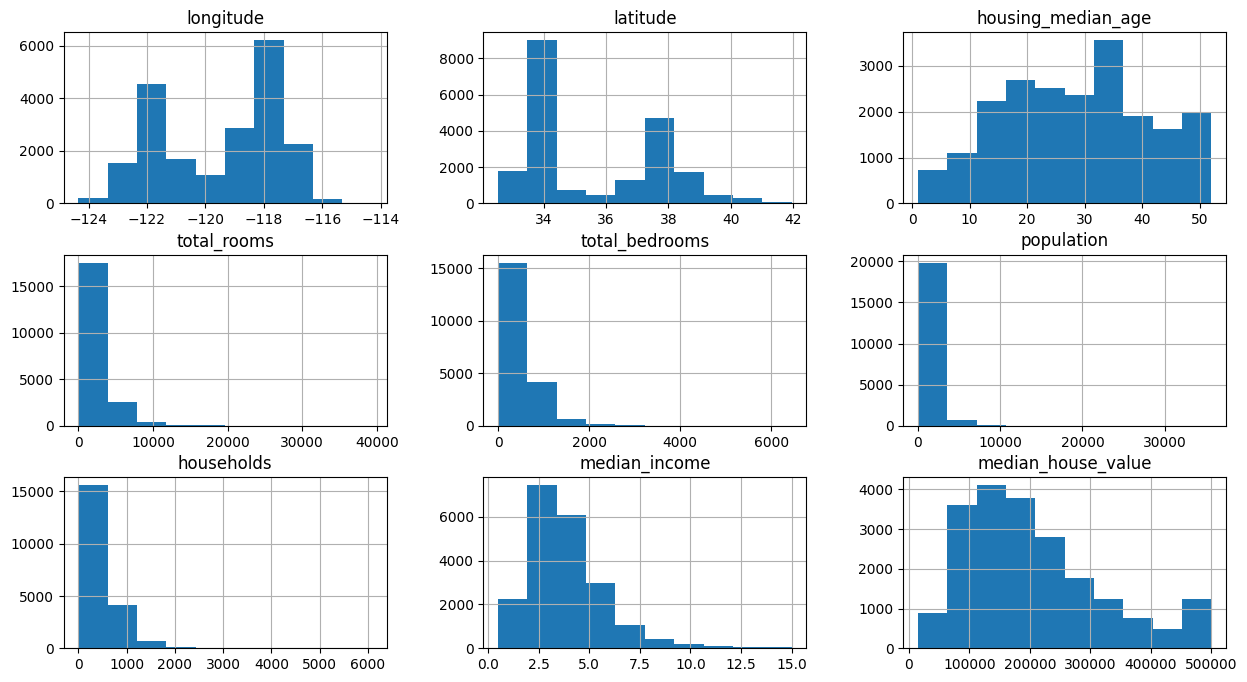

In [116]:
train_data.hist(figsize=(15,8))

<Axes: >

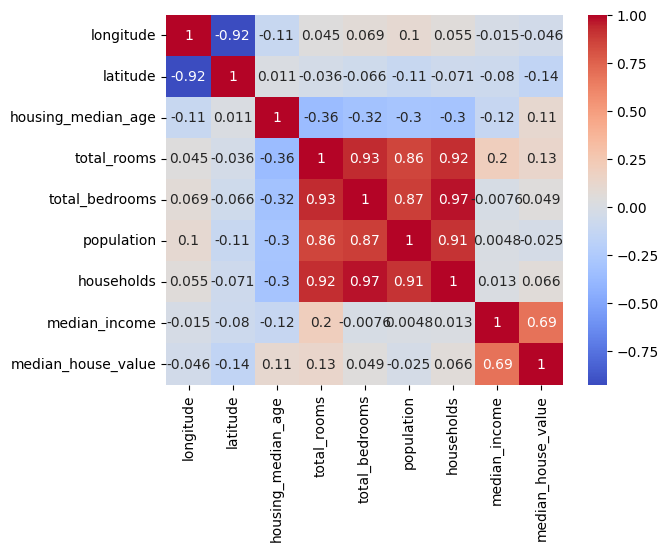

In [117]:
sns.heatmap(train_data.drop(columns=['ocean_proximity']).corr(), annot=True, cmap='coolwarm')

As can be seen in the histgrams of some features, the graphs are skewed instead of gaussian curve, we need to transform such features. We'll use log transformation

In [118]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

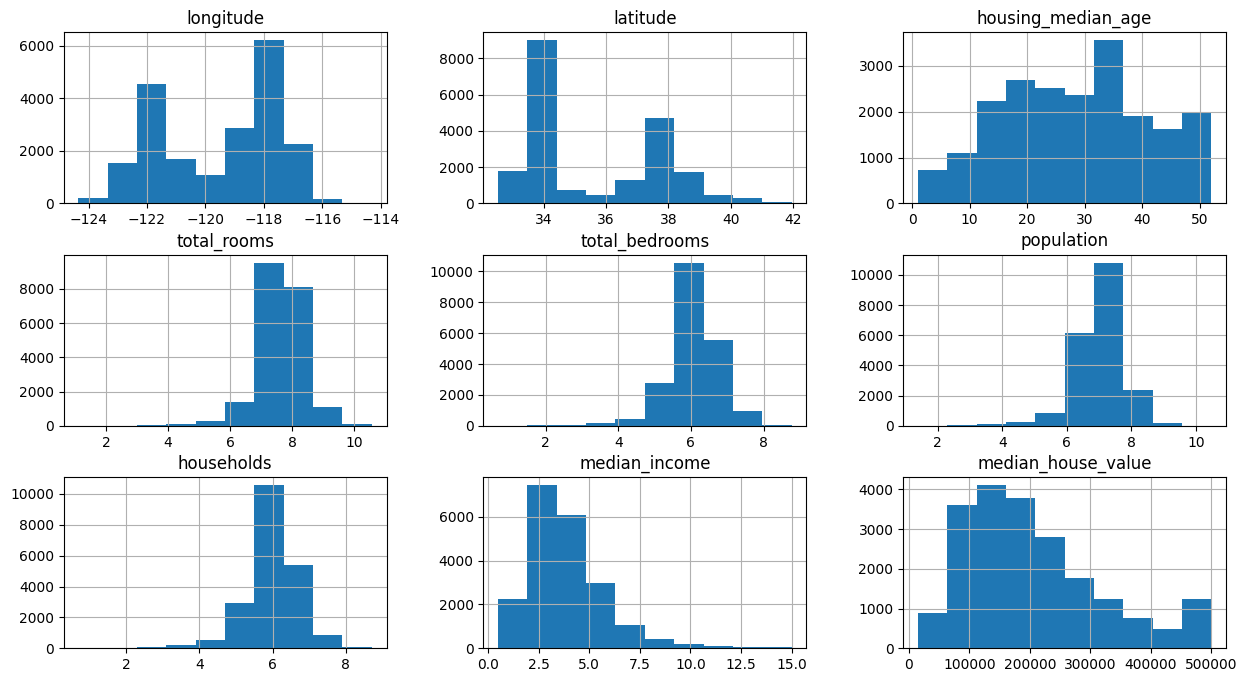

In [119]:
train_data.hist(figsize=(15,8))

After the tranformation, they are more normally distributed.

Now we have to use Ocean_proximity feature, in order to use it we have to turn it into numerical value. We'll do that using one-hot encoding.

In [120]:
train_data.ocean_proximity.value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [121]:
one_hot_encodded = pd.get_dummies(train_data.ocean_proximity)

In [122]:
train_data = train_data.join(one_hot_encodded)

In [123]:
train_data.drop(columns=['ocean_proximity'], inplace=True)

In [124]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,False,True,False,False,False


<Axes: >

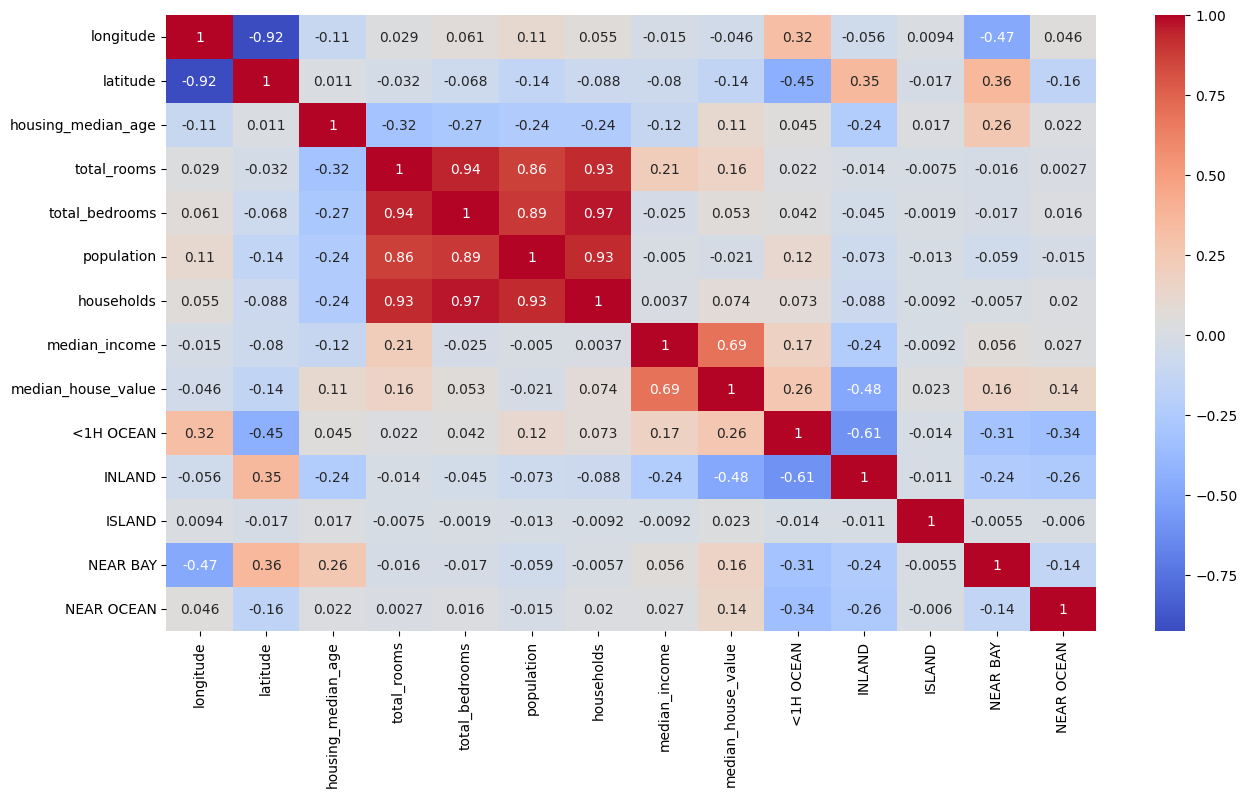

In [125]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='latitude', ylabel='longitude'>

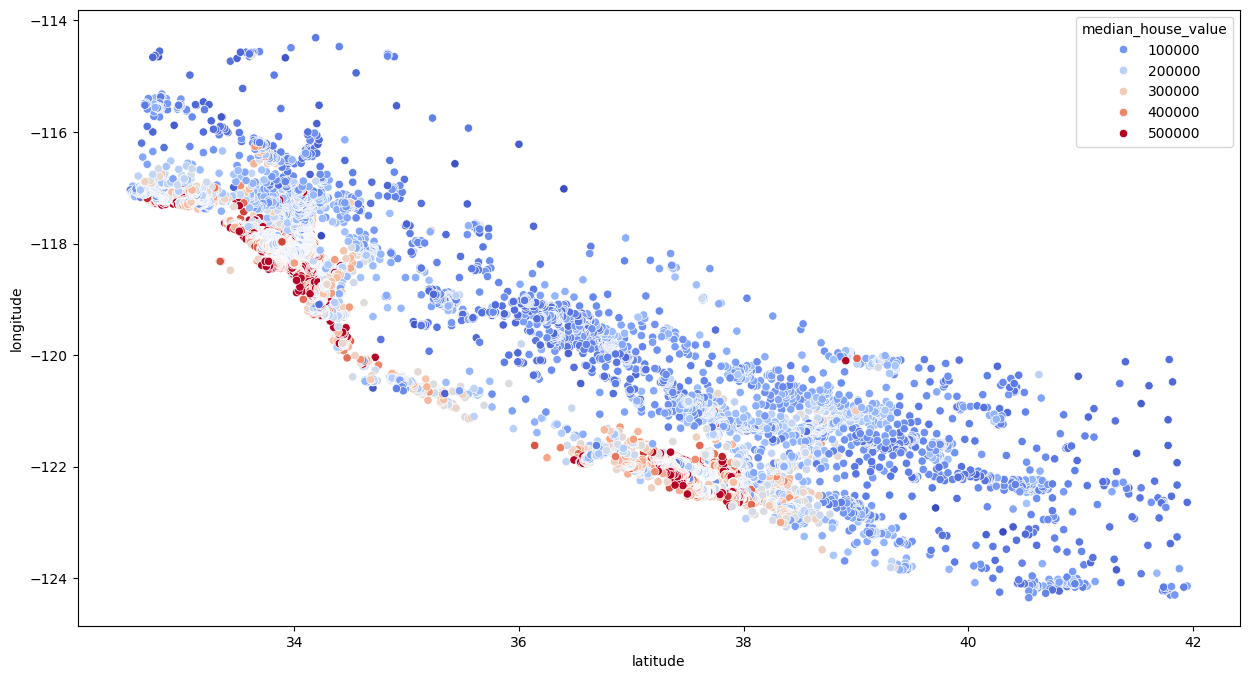

In [126]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data = train_data, hue='median_house_value', palette='coolwarm')

# **Feature Engineering**

we can create more features like bedroom ratio = total bedroom/total rooms

In [127]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']

household_rooms = total_rooms / household

In [128]:
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

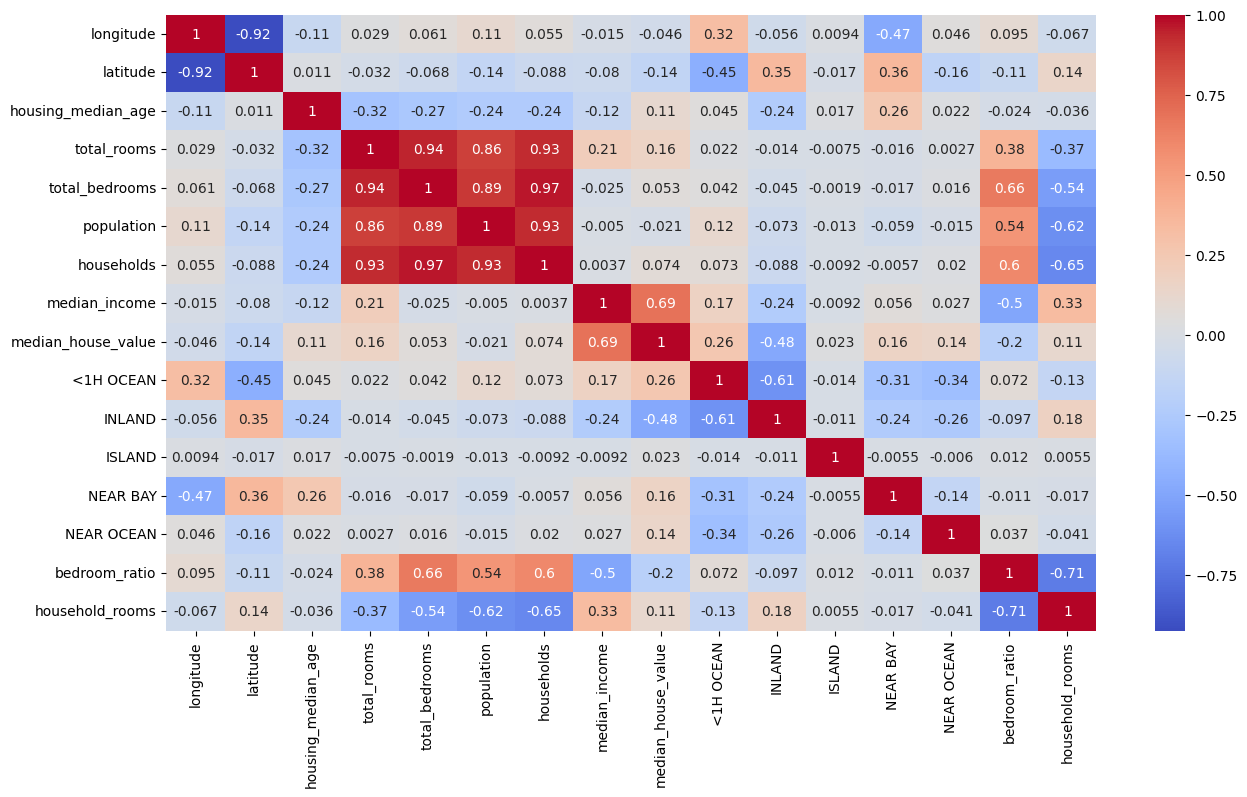

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [129]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  bool   
 10  INLAND              20640 non-null  bool   
 11  ISLAND              20640 non-null  bool   
 12  NEAR BAY            20640 non-null  bool   
 13  NEAR OCEAN          20640 non-null  bool   
 14  bedroom_ratio       20640 non-null  float64
 15  household_rooms     20640 non-null  float64
dtypes: b

# **Model Training**

**Linear Regression**

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = train_data.drop(columns=['median_house_value'])
y = train_data['median_house_value']



In [131]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [133]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [134]:
reg.score(X_test, y_test)

0.6743960483559974

**Random Forest**

In [135]:
from sklearn.ensemble import RandomForestRegressor

In [136]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [137]:
forest.score(X_test, y_test)

0.8187988153017483

In [138]:
from sklearn.model_selection import GridSearchCV
forest = RandomForestRegressor()
param_grid = {
    'n_estimators': [3, 10, 30],
    'max_features' : [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [139]:
best_forest = grid_search.best_estimator_

In [140]:
best_forest.score(X_test, y_test)

0.8151699532314312